# Data Loading & Exploration

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv", parse_dates=["Date Time"])
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


### Data Card
| Index | Features     | Format              | Description |
|-------|------------|---------------------|-------------|
| 1     | Date Time   | 01.01.2009 00:10:00 | Date-time reference |
| 2     | p (mbar)   | 996.52              | The pascal SI derived unit of pressure used to quantify internal pressure. Meteorological reports typically state atmospheric pressure in millibars. |
| 3     | T (degC)   | -8.02               | Temperature in Celsius |
| 4     | Tpot (K)   | 265.4               | Temperature in Kelvin |
| 5     | Tdew (degC) | -8.9               | Temperature in Celsius relative to humidity. Dew Point is a measure of the absolute amount of water in the air, the DP is the temperature at which the air cannot hold all the moisture in it and water condenses. |
| 6     | rh (%)     | 93.3                | Relative Humidity is a measure of how saturated the air is with water vapor, the %RH determines the amount of water contained within collection objects. |
| 7     | VPmax (mbar) | 3.33              | Saturation vapor pressure |
| 8     | VPact (mbar) | 3.11              | Vapor pressure |
| 9     | VPdef (mbar) | 0.22              | Vapor pressure deficit |
| 10    | sh (g/kg)  | 1.94                | Specific humidity |
| 11    | H2OC (mmol/mol) | 3.12          | Water vapor concentration |
| 12    | rho (g/m³) | 1307.75             | Airtight |
| 13    | wv (m/s)   | 1.03                | Wind speed |
| 14    | max. wv (m/s) | 1.75             | Maximum wind speed |
| 15    | wd (deg)   | 152.3               | Wind direction in degrees |


### From data card:
- only use one temperature, so I chose celisius (Though Kelvin has absolute 0, but no difference for lstms)
- relative humidity is a combination of temperature and humidity, so I will leave it to not leak info to the model
- VPdif is just a subtraction of an already existing features so I will drop the features, and only leave VPdif to explain them

In [2]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format="%d.%m.%Y %H:%M:%S")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  datetime64[ns]
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

In [4]:
len(df['Date Time'].dt.date.unique()) # number of days

2921

In [5]:
df.describe()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,2012-12-30 06:26:51.498725120,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
min,2009-01-01 00:10:00,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,2010-12-31 03:25:00,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,2012-12-30 06:20:00,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,2014-12-29 18:55:00,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,2017-01-01 00:00:00,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000
std,NaN,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693


(0.0, 32.0)

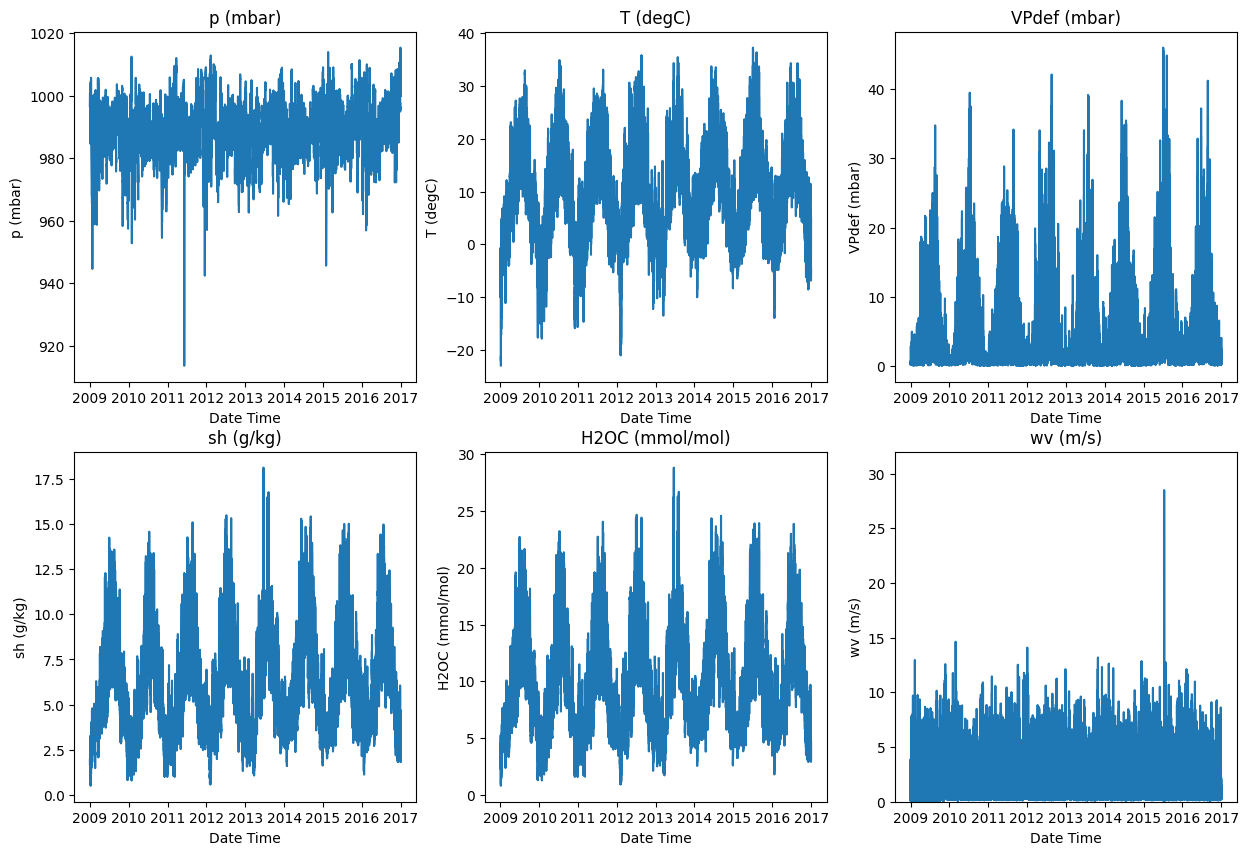

In [6]:
from matplotlib import pyplot as plt

# Plotting key features
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].plot(df['Date Time'], df['p (mbar)'])
ax[0, 0].set_title("p (mbar)")
ax[0, 0].set_xlabel("Date Time")
ax[0, 0].set_ylabel("p (mbar)")

ax[0, 1].plot(df['Date Time'], df['T (degC)'])
ax[0, 1].set_title("T (degC)")
ax[0, 1].set_xlabel("Date Time")
ax[0, 1].set_ylabel("T (degC)")

ax[0, 2].plot(df['Date Time'], df['VPdef (mbar)'])
ax[0, 2].set_title("VPdef (mbar)")
ax[0, 2].set_xlabel("Date Time")
ax[0, 2].set_ylabel("VPdef (mbar)")

ax[1, 0].plot(df['Date Time'], df['sh (g/kg)'])
ax[1, 0].set_title("sh (g/kg)")
ax[1, 0].set_xlabel("Date Time")
ax[1, 0].set_ylabel("sh (g/kg)")

ax[1, 1].plot(df['Date Time'], df['H2OC (mmol/mol)'])
ax[1, 1].set_title("H2OC (mmol/mol)")
ax[1, 1].set_xlabel("Date Time")
ax[1, 1].set_ylabel("H2OC (mmol/mol)")

ax[1, 2].plot(df['Date Time'], df['wv (m/s)'])
ax[1, 2].set_title("wv (m/s)")
ax[1, 2].set_xlabel("Date Time")
ax[1, 2].set_ylabel("wv (m/s)")
ax[1, 2].set_ylim(0, 32)

# Data Preprocessing & Feature Engineering

In [7]:
df = df.drop(["rh (%)", "VPmax (mbar)", "Tpot (K)", "VPact (mbar)", "Tdew (degC)", "Tdew (degC)"], axis=1)

In [8]:
# removing outliers
df["wv (m/s)"] = df["wv (m/s)"].clip(lower=0)
df["max. wv (m/s)"] = df["max. wv (m/s)"].clip(lower=0)

In [9]:
# Standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[df.columns.drop("Date Time")] = scaler.fit_transform(df[df.columns.drop("Date Time",)])

In [33]:
# Creating sliding windows of 24 hours
windows = []
target = []
X = df.drop(["Date Time", "T (degC)"] , axis=1)
Y = df["T (degC)"]
for i in range(0, len(df) - 144, 144):
    windows.append(X.iloc[i:i+144].values)
    target.append(Y.iloc[i+144])
windows = np.array(windows)
target = np.array(target).reshape(-1, 1)
windows.shape, target.shape

((2920, 144, 8), (2920, 1))

In [34]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(windows, target, test_size=0.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2336, 144, 8), (584, 144, 8), (2336, 1), (584, 1))

# LSTM & GRU Models Development, Training & Evaluation

In [35]:

# Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint_callback = ModelCheckpoint(
    filepath='models/model_lstm.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


# learning rate reduce on plateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.1,
                              patience=3, 
                              min_lr=0.001)

In [36]:
import tensorflow as tf
from IPython.display import display
# Creating the model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="linear")
    ])
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
model_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[model_checkpoint_callback, reduce_lr])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 144, 128)          70144     
                                                                 
 lstm_17 (LSTM)              (None, 128)               131584    
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                

In [40]:
model_checkpoint_callback = ModelCheckpoint(
    filepath='models/model_gru.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
# Creating the model
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="linear")
    ])
model_gru.compile(optimizer="adam", loss="mse")
model_gru.summary()
model_gru.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[model_checkpoint_callback, reduce_lr])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 144, 128)          52992     
                                                                 
 gru_5 (GRU)                 (None, 128)               99072     
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 1)               

19/19 [==============================] - 0s 12ms/step


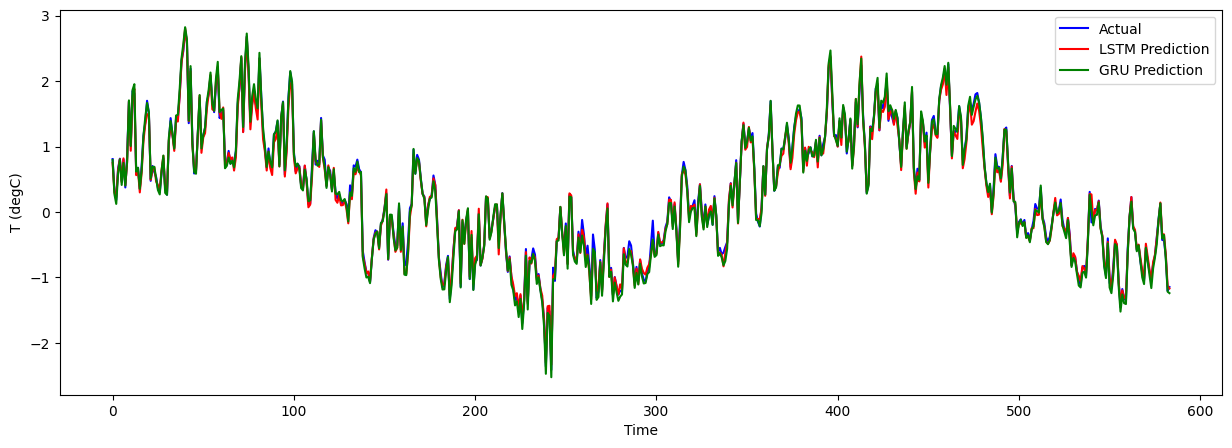

In [42]:
# Visulaizing predictions vs actual values
plt.figure(figsize=(15, 5))
model_lstm.load_weights("models/model_lstm.keras")
y_pred = model_lstm.predict(X_test)
plt.plot(y_test, color="blue", label="Actual")
plt.plot(y_pred, color="red", label="LSTM Prediction")
model_gru.load_weights("models/model_gru.keras")
y_pred = model_gru.predict(X_test)
plt.plot(y_pred, color="green", label="GRU Prediction")
plt.xlabel("Time")
plt.ylabel("T (degC)")
plt.legend()
plt.show()

In [47]:
metrics = []
metrics.append(model_lstm.evaluate(X_test, y_test))
metrics.append(model_gru.evaluate(X_test, y_test))

metrics = pd.DataFrame(metrics)
metrics.columns = ["MSE"]
metrics.index = ["LSTM", "GRU"]
metrics


19/19 [==============================] - 0s 15ms/step - loss: 0.0040


,MSE
LSTM,0.004902
GRU,0.004037
